# <center>Seaborn可视化</center>

# 1 导入包

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 配置matplotlib

In [3]:
# 配置matplotlib页内可视
%matplotlib inline
# 配置matplotlib可显示中文，并设置字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 配置matplotlib坐标轴可以显示负数
plt.rcParams['axes.unicode_minus'] = False

# 3 加载文件

In [4]:
colums = ['user_id', 'user_dt', 'user_products', 'user_amount']
df = pd.read_table('./pandas_data/CDNOW_master.txt', names=colums, sep='\s+', parse_dates=[1])

In [5]:
df.head()

,user_id,user_dt,user_products,user_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id          69659 non-null int64
user_dt          69659 non-null datetime64[ns]
user_products    69659 non-null int64
user_amount      69659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


# 4 图表类型

[Seaborn图表官网示例](http://seaborn.pydata.org/examples/index.html)

**分布**
- **distplot概率分布图**
- **kdeplot分布图**
- **jointplot分布图**
- **pairplot多变量图**

**分类**
- **boxplots箱线图**
- **violinplots提琴图**
- **barplot柱形图**
- **factorplot因子图**

**线性**
- **implot回归图**
- **heatmap热力图**

## 4.1 分布类型图表

**用户消费金额的概率分布图（可以使用hist和kde两个参数来控制图形样式)**

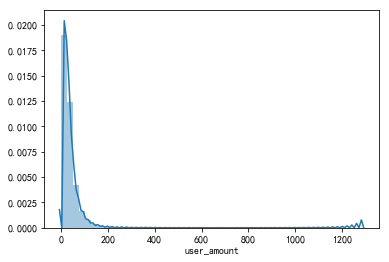

In [7]:
sns.distplot(df.user_amount)

**用户消费次数和消费金额的联合概率密度图**

In [8]:
grouped_user = df.groupby('user_id').sum()

In [9]:
grouped_user.head()

,user_products,user_amount
user_id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61


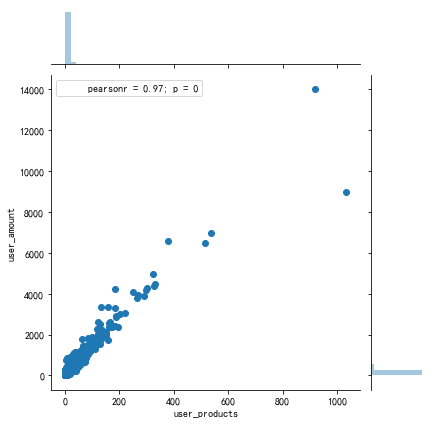

In [10]:
sns.jointplot(x=grouped_user.user_products, y=grouped_user.user_amount)

**将df表处理成RFM模型需要的数据**

In [13]:
rfm = df.pivot_table(index='user_id',
                     values=['user_dt', 'user_products', 'user_amount'],
                     aggfunc={
                         'user_dt': 'max',
                         'user_products': 'sum',
                         'user_amount': 'sum'
                     }
                    )
rfm.head()

,user_amount,user_dt,user_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


**将user_dt列转化为R列，其中当前时间使用user_dt的最大值**

In [20]:
rfm['R'] = (df.user_dt.max() - rfm.user_dt) / np.timedelta64(1, 'D')

In [23]:
rfm.rename(columns={'user_amount': 'M', 'user_products': 'F'}, inplace=True)

In [38]:
rfm_d = rfm[['R', 'F', 'M']]
rfm_d.head()

,R,F,M
user_id,,,
1,545.0,1.0,11.77
2,534.0,6.0,89.00
3,33.0,16.0,156.46
4,200.0,7.0,100.50
5,178.0,29.0,385.61


In [39]:
rfm_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23571 entries, 1 to R
Data columns (total 3 columns):
R    23570 non-null float64
F    23570 non-null float64
M    23570 non-null float64
dtypes: float64(3)
memory usage: 1.3+ MB


In [43]:
rfm_d = rfm_d.dropna()
rfm_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23570 entries, 1 to 23570
Data columns (total 3 columns):
R    23570 non-null float64
F    23570 non-null float64
M    23570 non-null float64
dtypes: float64(3)
memory usage: 736.6+ KB


**画出RFM模型的多变量图（散点矩阵图）**

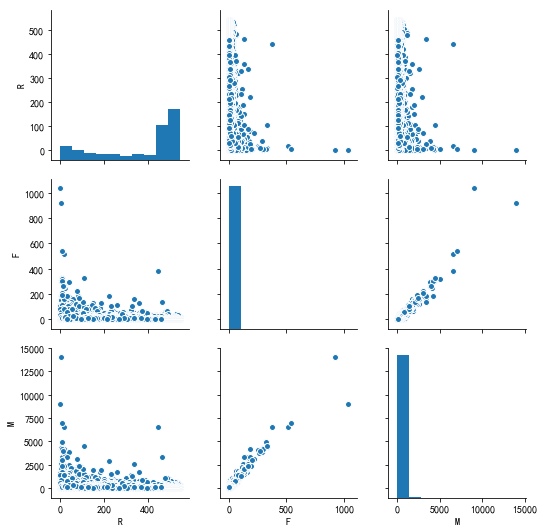

In [44]:
sns.pairplot(rfm_d)

## 4.2 分类类型图表

**加载餐饮数据**

In [47]:
df_cy = pd.read_csv('./pandas_data/cy.csv')
df_cy.head()

,店名id,城市,类型,店名,点评,人均,口味,环境,服务
0,1,北京,私房菜,梧桐宇私房菜,45.0,80.0,7.3,7.3,7.1
1,2,北京,私房菜,小东北私房菜,1.0,35.0,6.9,6.9,6.9
2,3,北京,私房菜,辣家私房菜,1.0,NaN,6.9,6.9,6.9
3,4,北京,私房菜,鸿福天原,NaN,NaN,NaN,NaN,NaN
4,5,北京,私房菜,虾而美(北京)餐饮管理有限公司,NaN,NaN,NaN,NaN,NaN


In [48]:
df_cy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 9 columns):
店名id    5863 non-null int64
城市      5863 non-null object
类型      5863 non-null object
店名      5863 non-null object
点评      4509 non-null float64
人均      3012 non-null float64
口味      4425 non-null float64
环境      4425 non-null float64
服务      4425 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 412.3+ KB


**各个类型菜品口味的箱线图**

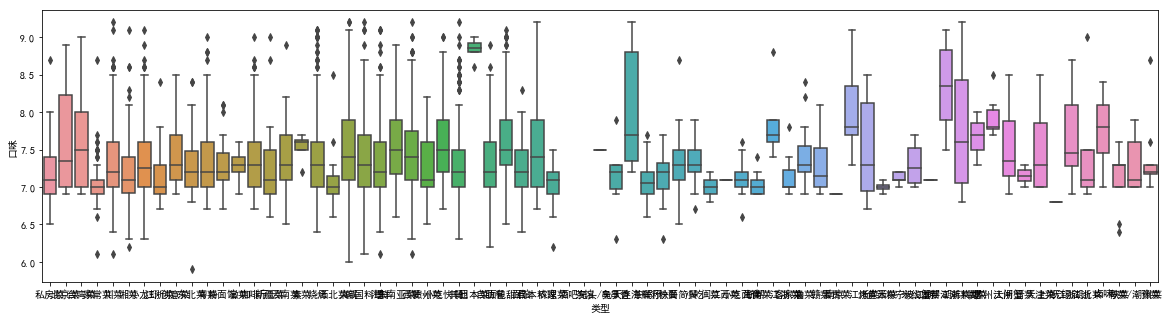

In [50]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='类型', y='口味', data=df_cy)

**北京市和上海市各个类型菜品口味箱线图**

In [52]:
df_city = df_cy.query("(城市=='北京') | (城市=='上海')")

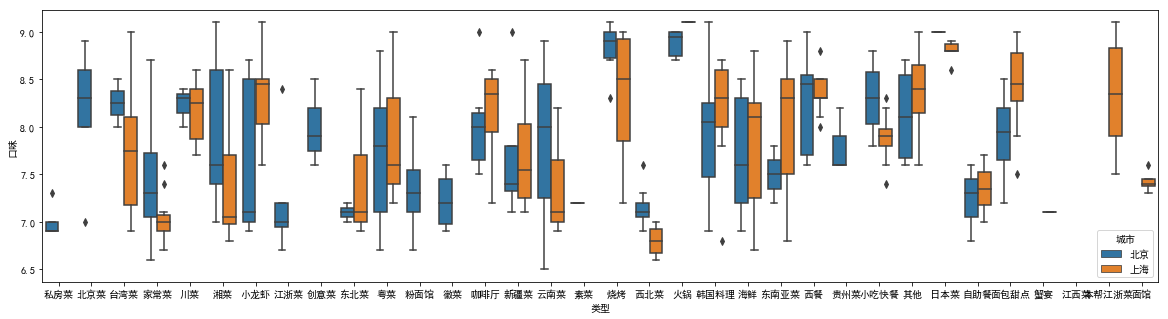

In [55]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='类型', y='口味', hue='城市', data=df_city)